# A Box Office Analysis

## 1. Business Understanding

### a) Introduction

Watching movies has become increasingly popular in the fast pace of modern life. People watch movies to relax, learn life skills, learn a new language, get motivation, or even as background noise as they do something else. 
As of early 2022, Netflix, a popular streaming site, recorded  users watching over 400 million hours of content per week globally.

The box office refers to the degree of success of a film or play in terms of the number of people who go to watch it or the amount of money it makes. 
According to Medium; the recipe for creating a box office success is complex and multifaceted. It requires a combination of compelling storytelling, talented actors, stunning visuals, strategic marketing, cultural relevance, and above all else, an emotional connection with the audience.


Microsoft wants to venture into movie production but they lack expertise in filmmaking.
This project will involve analyzing data from different sources to figure out which movies are doing the best at the box office. Insights will then be derived from the analysis to provide more information to the head of Microsoft's studio.

### b) Problem Statement

After observing the success of other big companies in original video content creation, Microsoft wants to venture into movie production. They want to open a studio but they lack expertise in filmmaking. The task is to conduct an analysis of trends and successful genres doing well at the box office. The findings will then be translated into actionable insights and recommendations for the head of Microsoft's movie studio. These insights will be used to guide the decision-making process regarding the types of films Microsoft should focus on producing to maximize commercial success and audience engagement in the competitive movie industry.

### c) Main Objective

To provide actionable insights based on an analysis into the films dominating the box office.


### d) Specific Objectives

- Analyze datasets to find out which types of films are dominating the box office.
- Provide findings and recommendations from the analysis.
- Provide actionable insights that will help Microsoft in its video creation journey.

### e) Experimental Design

1. Data collection
2. Read data
3. Data wrangling
4. Exploratory Data Analysis
5. Conclusions 
6. Recommendations

### f) Data Understanding

The data used in this project was obtained from: [Box Office Mojo](https://www.boxofficemojo.com/),  [IMDB](https://www.imdb.com/),  [Rotten Tomatoes](https://www.rottentomatoes.com/), [TMDB](https://www.themoviedb.org/) and  [The Numbers](https://www.the-numbers.com/).


- The **Box Office Mojo Dataset** contains *5 columns and 3387 rows*. The columns are: 'title', 'studio', 'domestic_gross', 'foreign_gross', and 'year'. This Dataset is relevant as it shows which movies studios are making and the income they have earned from the movies.

- The **IMDB Dataset** contains *9 tables* each with its own columns. The tables include 'movie_basics' which has information like run times and titles of movies and 'movie_ratings' which has average ratings and number of votes a movie got.


- The **Rotten Tomatoes Dataset** contains *1560 rows and 12 columns*. The columns are: 'id', 'synopsis', 'rating', 'genre', 'director', 'writer','theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', and 'studio'. This dataset provides insight into movie genres, their ratings, the writers and even air dates.

- The **TMDB Dataset** contains *26517 rows and 10 columns*. The columns are:'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', and 'vote_count'. This dataset provides extra information into original languages, popularity and titles for movies.

- The Dataset from **The Numbers** contains *5782 rows and 6 columns*. The columns are: 'id', 'release_date', 'movie', 'production_budget', 'domestic_gross', and 'worldwide_gross'. This dataset is relevant as it shows movie, how much the budget for production was and how much income they grossed worldwide.

## 2. Importing Libraries

In [66]:
# importing libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


## 3. Reading the Data

In [3]:
# Loading movie gross income data
movie_gross = pd.read_csv("DataSets/bom.movie_gross.csv.gz" )
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Loading movie info data
movie_info = pd.read_csv("DataSets/rt.movie_info.tsv.gz" , sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
# Loading movie reviews data
movie_reviews = pd.read_csv("DataSets/rt.reviews.tsv.gz", sep='\t', encoding='latin1')
movie_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
# Loading tmdb data
tmdb = pd.read_csv("DataSets/tmdb.movies.csv.gz" )
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
# Loading movie budgets data
movie_budgets = pd.read_csv("DataSets/tn.movie_budgets.csv.gz" )
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [69]:
# Connect to the sqlite3 database
conn = sqlite3.connect('DataSets/im.db/im.db')

# Create a cursor object
cursor = conn.cursor()

# Get names of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()
for name in table_names:
    print(name[0]) 


movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers
reviews_table


## 4. Data Wrangling
This process is to convert the data into a more useable form.

### 4.1 Dropping Columns.
The first step involves getting information about the data frames. 
The data frames are then analyzed to determine the number of missing values present in each column. 
Using the gathered information, the final step is discarding unnecessary columns, retaining only the necessary ones.

#### 4.1.1 movie_gross Data Frame

In [9]:
# getting info about movie_gross dataset
movie_gross.info

<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [10]:
#getting number of NaN values in the movie_gross dataset
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
#changing NaN values to 0 in foreign_gross in movie_gross 
movie_gross['foreign_gross'].fillna(0, inplace=True)
movie_gross['foreign_gross'] 

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3387, dtype: object

In [12]:
# getting sum of domestic_gross and foreign_gross to get total gross income.
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',', '').astype(float)
movie_gross['total_gross'] = (movie_gross['domestic_gross'] + pd.to_numeric(movie_gross['foreign_gross']))
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [13]:
# Selecting relevant columns.
movie_gross_1 = movie_gross[["title", "studio", "total_gross"]]
movie_gross_1

,title,studio,total_gross
0,Toy Story 3,BV,1.067000e+09
1,Alice in Wonderland (2010),BV,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,9.603000e+08
3,Inception,WB,8.283000e+08
4,Shrek Forever After,P/DW,7.526000e+08
...,...,...,...
3382,The Quake,Magn.,NaN
3383,Edward II (2018 re-release),FM,NaN
3384,El Pacto,Sony,NaN
3385,The Swan,Synergetic,NaN


#### 4.1.2 movie_info Data Frame

In [14]:
# getting info about movie_info dataset
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [15]:
#getting number of NaN values in the movie_info dataset
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [16]:
# Selecting relevant columns.
movie_info_1 = movie_info[["rating", "genre", "director", "writer", "runtime"]]
movie_info_1

,rating,genre,director,writer,runtime
0,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,104 minutes
1,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,108 minutes
2,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,116 minutes
3,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,128 minutes
4,NR,Drama|Romance,Rodney Bennett,Giles Cooper,200 minutes
...,...,...,...,...,...
1555,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,106 minutes
1556,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,88 minutes
1557,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,111 minutes
1558,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,101 minutes


#### 4.1.3 movie_reviews Data Frame

In [17]:
# getting info about movie_reviews dataset
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [18]:
#getting number of NaN values in the movie_reviews dataset
movie_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [19]:
# Selecting relevant columns.
movie_reviews_1 = movie_reviews[["rating", "critic"]]
movie_reviews_1

,rating,critic
0,3/5,PJ Nabarro
1,NaN,Annalee Newitz
2,NaN,Sean Axmaker
3,NaN,Daniel Kasman
4,NaN,NaN
...,...,...
54427,NaN,Laura Sinagra
54428,1/5,Michael Szymanski
54429,2/5,Emanuel Levy
54430,2.5/5,Christopher Null


#### 4.1.4 tmdb Data Frame

In [20]:
# getting info about tmdb dataset
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [21]:
#getting number of NaN values in the tmdb dataset
tmdb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [22]:
# Selecting relevant columns.
tmdb_1 =tmdb[["title", "vote_average", "vote_count", "popularity"]]
tmdb_1

,title,vote_average,vote_count,popularity
0,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,33.533
1,How to Train Your Dragon,7.7,7610,28.734
2,Iron Man 2,6.8,12368,28.515
3,Toy Story,7.9,10174,28.005
4,Inception,8.3,22186,27.920
...,...,...,...,...
26512,Laboratory Conditions,0.0,1,0.600
26513,_EXHIBIT_84xxx_,0.0,1,0.600
26514,The Last One,0.0,1,0.600
26515,Trailer Made,0.0,1,0.600


#### 4.1.5 movie_budgets Data Frame

In [23]:
# getting info about movie_budgets dataset
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [24]:
#getting number of NaN values in the movie_budgets dataset
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [25]:
# Selecting relevant columns.
movie_budgets_1 = movie_budgets[["movie", "production_budget", "worldwide_gross"]]
movie_budgets_1

,movie,production_budget,worldwide_gross
0,Avatar,"$425,000,000","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...
5777,Red 11,"$7,000",$0
5778,Following,"$6,000","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338"
5780,A Plague So Pleasant,"$1,400",$0


#### 4.1.6 Exploring the im.db database to see the kind of information contained in the tables.

In [26]:
# Getting data from principals table 
cursor.execute("SELECT * FROM principals LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row) 

('tt0111414', 1, 'nm0246005', 'actor', None, '["The Man"]')
('tt0111414', 2, 'nm0398271', 'director', None, None)
('tt0111414', 3, 'nm3739909', 'producer', 'producer', None)
('tt0323808', 10, 'nm0059247', 'editor', None, None)
('tt0323808', 1, 'nm3579312', 'actress', None, '["Beth Boothby"]')


In [27]:
# Getting data from persons table 
cursor.execute("SELECT * FROM persons LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row)

('nm0061671', 'Mary Ellen Bauder', None, None, 'miscellaneous,production_manager,producer')
('nm0061865', 'Joseph Bauer', None, None, 'composer,music_department,sound_department')
('nm0062070', 'Bruce Baum', None, None, 'miscellaneous,actor,writer')
('nm0062195', 'Axel Baumann', None, None, 'camera_department,cinematographer,art_department')
('nm0062798', 'Pete Baxter', None, None, 'production_designer,art_department,set_decorator')


In [28]:
# Getting data from movie_basics table 
cursor.execute("SELECT * FROM movie_basics LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row) 

('tt0063540', 'Sunghursh', 'Sunghursh', 2013, 175.0, 'Action,Crime,Drama')
('tt0066787', 'One Day Before the Rainy Season', 'Ashad Ka Ek Din', 2019, 114.0, 'Biography,Drama')
('tt0069049', 'The Other Side of the Wind', 'The Other Side of the Wind', 2018, 122.0, 'Drama')
('tt0069204', 'Sabse Bada Sukh', 'Sabse Bada Sukh', 2018, None, 'Comedy,Drama')
('tt0100275', 'The Wandering Soap Opera', 'La Telenovela Errante', 2017, 80.0, 'Comedy,Drama,Fantasy')


In [29]:
# Getting data from movie_ratings table 
cursor.execute("SELECT * FROM movie_ratings LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row) 

('tt10356526', 8.3, 31)
('tt10384606', 8.9, 559)
('tt1042974', 6.4, 20)
('tt1043726', 4.2, 50352)
('tt1060240', 6.5, 21)


In [30]:
# Getting data from movie_akas table 
cursor.execute("SELECT * FROM movie_akas LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row) 

('tt0369610', 10, 'Джурасик свят', 'BG', 'bg', None, None, 0.0)
('tt0369610', 11, 'Jurashikku warudo', 'JP', None, 'imdbDisplay', None, 0.0)
('tt0369610', 12, 'Jurassic World: O Mundo dos Dinossauros', 'BR', None, 'imdbDisplay', None, 0.0)
('tt0369610', 13, 'O Mundo dos Dinossauros', 'BR', None, None, 'short title', 0.0)
('tt0369610', 14, 'Jurassic World', 'FR', None, 'imdbDisplay', None, 0.0)


In [31]:
# Getting data from known_for table 
cursor.execute("SELECT * FROM known_for LIMIT 5;")
results = cursor.fetchall()

for row in results:
    print(row) 

('nm0061671', 'tt0837562')
('nm0061671', 'tt2398241')
('nm0061671', 'tt0844471')
('nm0061671', 'tt0118553')
('nm0061865', 'tt0896534')


The data in the known_for, movie_directors and writers tables are all the same; person_id and movie_id.

### 4.2 Formatting Datatypes.
The first step is to check the datatypes for all columns in the dataframe.
The datatypes are then changed as needed; eg converting data to numeric form so you can plot it in graphs.

#### 4.2.1 movie_gross_1

In [32]:
#checking datatypes of movie_gross_1 dataframe
movie_gross_1.dtypes

title           object
studio          object
total_gross    float64
dtype: object

total_gross is a float so there is no need for conversion.

#### 4.2.2 movie_info_1

In [33]:
#checking datatypes of movie_info_1 dataframe
movie_info_1.dtypes

rating      object
genre       object
director    object
writer      object
runtime     object
dtype: object

In [34]:
#converting runtime and rating into strings
movie_info_1.loc[:,'runtime'] = movie_info_1['runtime'].astype(str)
movie_info_1.loc[:,'rating'] = movie_info_1['rating'].astype(str)


#### 4.2.3 movie_reviews_1

In [35]:
#checking datatypes of movie_reviews_1 dataframe
movie_reviews_1.dtypes

rating    object
critic    object
dtype: object

#### 4.2.4 tmdb_1

In [36]:
#checking datatypes of tmdb_1 dataframe
tmdb_1.dtypes

title            object
vote_average    float64
vote_count        int64
popularity      float64
dtype: object

#### 4.2.5 movie_budgets_1

In [37]:
#checking datatypes of movie_budgets_1 dataframe
movie_budgets_1.dtypes

movie                object
production_budget    object
worldwide_gross      object
dtype: object

In [38]:
# Removing '$' and ',' from 'worldwide_gross' and 'production_budget' columns
movie_budgets_1.loc[:, 'worldwide_gross'] = movie_budgets_1['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True)
movie_budgets_1.loc[:, 'production_budget'] = movie_budgets_1['production_budget'].replace({'\$': '', ',': ''}, regex=True)

# Converting the columns to numeric type
movie_budgets_1.loc[:, 'worldwide_gross'] = pd.to_numeric(movie_budgets_1['worldwide_gross'])
movie_budgets_1.loc[:, 'production_budget'] = pd.to_numeric(movie_budgets_1['production_budget'])

print(movie_budgets_1)


                                            movie production_budget  \
0                                          Avatar         425000000   
1     Pirates of the Caribbean: On Stranger Tides         410600000   
2                                    Dark Phoenix         350000000   
3                         Avengers: Age of Ultron         330600000   
4               Star Wars Ep. VIII: The Last Jedi         317000000   
...                                           ...               ...   
5777                                       Red 11              7000   
5778                                    Following              6000   
5779                Return to the Land of Wonders              5000   
5780                         A Plague So Pleasant              1400   
5781                            My Date With Drew              1100   

     worldwide_gross  
0         2776345279  
1         1045663875  
2          149762350  
3         1403013963  
4         1316721747  
...      

### 4.3 Tidying the Dataset.
The data is tidied up and made more readable to allow for analysis.

#### 4.3.1 movie_gross_1

In [39]:
# Sorting the DataFrame by the 'studio' column
movie_gross_1_sorted = movie_gross_1.sort_values(by='studio')
studio_movie_counts = movie_gross_1_sorted.groupby('studio').size().reset_index(name='movie_count')
studio_movie_counts.index = studio_movie_counts.index + 1  # Set index starting at 1
studio_movie_counts = studio_movie_counts.sort_values(by='movie_count', ascending=False) # descending order

print(studio_movie_counts)


     studio  movie_count
114     IFC          166
239    Uni.          147
247      WB          140
94      Fox          136
149   Magn.          136
..      ...          ...
116     ITL            1
117     IVP            1
118      IW            1
122  Indic.            1
129     KKM            1

[257 rows x 2 columns]


It is easier to see how many movies each studio has made in this particular dataframe.

#### 4.3.2 movie_info_1

In [40]:
# Grouping by 'writer' and counting the number of movies each writer has worked on
writer_counts = movie_info_1.groupby('writer').size().reset_index(name='movie_count')

# Sorting the DataFrame by the number of movies each writer has written in descending order
sorted_writers = writer_counts.sort_values(by='movie_count', ascending=False).reset_index(drop=True)

print(sorted_writers)


                         writer  movie_count
0                   Woody Allen            4
1                   John Hughes            3
2                  Jim Jarmusch            3
3            Sylvester Stallone            3
4                 Hong Sang-soo            3
...                         ...          ...
1064    Guy Maddin|George Toles            1
1065                Guy Ritchie            1
1066  Halley Feiffer|Ryan Spahn            1
1067  Hamish McColl|Jimmy Perry            1
1068   Zeresenay Berhane Mehari            1

[1069 rows x 2 columns]


It is easier to see how many movies each writer has made in this particular dataframe.

In [41]:
# Grouping by 'director' and counting the number of movies each director has worked on
director_counts = movie_info_1.groupby('director').size().reset_index(name='movie_count')

# Sorting the DataFrame by the number of movies each director has directed in descending order
sorted_directors = director_counts.sort_values(by='movie_count', ascending=False).reset_index(drop=True)

print(sorted_directors)


                    director  movie_count
0           Steven Spielberg           10
1             Clint Eastwood            8
2           William Friedkin            4
3                Yimou Zhang            4
4               Ridley Scott            4
...                      ...          ...
1120               Jack Webb            1
1121  Jackie Chan|Xavier Lee            1
1122      Jackie Earle Haley            1
1123             Jackie Kong            1
1124          Zhang Jun Zhao            1

[1125 rows x 2 columns]


It is easier to see how many movies each director has made in this particular dataframe.

#### 4.3.3 movie_reviews_1

In [42]:
# Grouping by 'critic' and counting the number of reviews for each critic
critic_review_counts = movie_reviews_1.groupby('critic').size().reset_index(name='review_count')

# Sorting the counts of reviews in descending order
sorted_critic_reviews = critic_review_counts.sort_values(by='review_count', ascending=False).reset_index(drop=True)

print(sorted_critic_reviews)


                  critic  review_count
0           Emanuel Levy           595
1            Roger Ebert           461
2        Dennis Schwartz           413
3             Nell Minow           372
4     James Berardinelli           348
...                  ...           ...
3491       Grant Jonsson             1
3492      Grant McAvaney             1
3493        Grant Watson             1
3494       Greg Bellavia             1
3495    Jonathan Roberts             1

[3496 rows x 2 columns]


It is easier to see how many reviews each critic has written in this particular dataframe.

#### 4.3.4 tmdb_1

In [43]:
# Sorting the DataFrame by 'popularity' in descending order
tmdb_sorted_by_popularity = tmdb_1.sort_values(by='popularity', ascending=False).reset_index(drop=True)

print(tmdb_sorted_by_popularity)


                                           title  vote_average  vote_count  \
0                         Avengers: Infinity War           8.3       13948   
1                                      John Wick           7.2       10081   
2              Spider-Man: Into the Spider-Verse           8.4        4048   
3      The Hobbit: The Battle of the Five Armies           7.3        8392   
4                                   The Avengers           7.6       19673   
...                                          ...           ...         ...   
26512                              Crème Caramel           5.0           1   
26513                                      Elegy           5.0           1   
26514                                     Jaguar           5.0           1   
26515             Unleashed! A Dog Dancing Story           5.0           1   
26516                                 The Church           0.0           1   

       popularity  
0          80.773  
1          78.123  
2  

It is easier to see the list of movies in this dataset from the most popular to the least popular.

#### 4.3.5 movie_budgets_1

In [44]:
# Sorting the DataFrame by 'worldwide_gross' in descending order
sorted_movie_budgets = movie_budgets_1.sort_values(by='worldwide_gross', ascending=False)

print(sorted_movie_budgets)


                                     movie production_budget worldwide_gross
0                                   Avatar         425000000      2776345279
42                                 Titanic         200000000      2208208395
5     Star Wars Ep. VII: The Force Awakens         306000000      2053311220
6                   Avengers: Infinity War         300000000      2048134200
33                          Jurassic World         215000000      1648854864
...                                    ...               ...             ...
5474                       Insomnia Manica            500000               0
5473                       Girls Gone Dead            500000               0
5472                         Enter Nowhere            500000               0
5471                                Drones            500000               0
4068                The Kings of Appletown           7000000               0

[5782 rows x 3 columns]


It is easier to see the highest and lowest grossing movies.

#### 4.3.6 im.db

In [45]:
# joining movie_basics, movie_ratings and movie_akas tables to get more info about the database.
query = """
    SELECT b.primary_title, b.runtime_minutes, b.genres, r.averagerating, r.numvotes,
           a.region, a.language
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id) 
    JOIN movie_akas AS a USING (movie_id) 

    LIMIT 10;
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Display data
for row in results:
    print(f"Title: {row[0]}")
    print(f"Duration: {row[1]}")
    print(f"Genres: {row[2]} minutes")
    print(f"Rating: {row[3]}")
    print(f"Number of Votes: {row[4]}")
    print(f"Region: {row[5]}")
    print(f"Language: {row[6]}")

    print("\n")



Title: Sunghursh
Duration: 175.0
Genres: Action,Crime,Drama minutes
Rating: 7.0
Number of Votes: 77
Region: None
Language: None


Title: Sunghursh
Duration: 175.0
Genres: Action,Crime,Drama minutes
Rating: 7.0
Number of Votes: 77
Region: IN
Language: None


Title: Sunghursh
Duration: 175.0
Genres: Action,Crime,Drama minutes
Rating: 7.0
Number of Votes: 77
Region: IN
Language: hi


Title: Sunghursh
Duration: 175.0
Genres: Action,Crime,Drama minutes
Rating: 7.0
Number of Votes: 77
Region: IN
Language: hi


Title: Sunghursh
Duration: 175.0
Genres: Action,Crime,Drama minutes
Rating: 7.0
Number of Votes: 77
Region: IN
Language: hi


Title: One Day Before the Rainy Season
Duration: 114.0
Genres: Biography,Drama minutes
Rating: 7.2
Number of Votes: 43
Region: None
Language: None


Title: One Day Before the Rainy Season
Duration: 114.0
Genres: Biography,Drama minutes
Rating: 7.2
Number of Votes: 43
Region: None
Language: None


Title: One Day Before the Rainy Season
Duration: 114.0
Genres: Bio

It is easier to see most of the important information pertaining to a movie at a glance.

In [46]:
# joining movie_basics and movie_ratings tables and ordering output by ascending order using average rating. 
query = """
    SELECT b.primary_title, b.runtime_minutes, b.genres, r.averagerating, r.numvotes
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id)
    ORDER BY r.averagerating DESC
    LIMIT 10;
"""
    
# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Display fetched data
for row in results:
    print(f"Title: {row[0]}")
    print(f"Duration: {row[1]}")
    print(f"Genres: {row[2]} minutes")
    print(f"Rating: {row[3]}")
    print(f"Number of Votes: {row[4]}")

    
    print("\n")
    



Title: Exteriores: Mulheres Brasileiras na Diplomacia
Duration: 52.0
Genres: Documentary minutes
Rating: 10.0
Number of Votes: 5


Title: The Dark Knight: The Ballad of the N Word
Duration: 129.0
Genres: Comedy,Drama minutes
Rating: 10.0
Number of Votes: 5


Title: Freeing Bernie Baran
Duration: 100.0
Genres: Crime,Documentary minutes
Rating: 10.0
Number of Votes: 5


Title: Hercule contre Hermès
Duration: 72.0
Genres: Documentary minutes
Rating: 10.0
Number of Votes: 5


Title: I Was Born Yesterday!
Duration: 31.0
Genres: Documentary minutes
Rating: 10.0
Number of Votes: 6


Title: Dog Days in the Heartland
Duration: None
Genres: Drama minutes
Rating: 10.0
Number of Votes: 5


Title: Revolution Food
Duration: 70.0
Genres: Documentary minutes
Rating: 10.0
Number of Votes: 8


Title: Fly High: Story of the Disc Dog
Duration: 65.0
Genres: Documentary minutes
Rating: 10.0
Number of Votes: 7


Title: All Around Us
Duration: None
Genres: Documentary minutes
Rating: 10.0
Number of Votes: 6



This shows the Title, Duration, Genres, Rating and Number of Votes for the movies with the highest ratings.

In [47]:
# joining movie_basics and movie_ratings tables and ordering output by ascending order using average rating. 
query = """
    SELECT b.primary_title, b.runtime_minutes, b.genres, r.averagerating, r.numvotes
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id)
    ORDER BY r.averagerating ASC
    LIMIT 10;
"""
    
# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Display fetched data
for row in results:
    print(f"Title: {row[0]}")
    print(f"Duration: {row[1]}")
    print(f"Genres: {row[2]} minutes")
    print(f"Rating: {row[3]}")
    print(f"Number of Votes: {row[4]}")

    
    print("\n")
    



Title: Hito no sabaku
Duration: 121.0
Genres: Drama minutes
Rating: 1.0
Number of Votes: 449


Title: Kamifûsen
Duration: 117.0
Genres: Drama minutes
Rating: 1.0
Number of Votes: 489


Title: Tunnel Rendez-vous
Duration: None
Genres: Comedy minutes
Rating: 1.0
Number of Votes: 125


Title: Kikkake wa You!
Duration: 75.0
Genres: Drama,Music minutes
Rating: 1.0
Number of Votes: 21


Title: A Moment of Youth
Duration: 143.0
Genres: Adventure,Biography,Comedy minutes
Rating: 1.0
Number of Votes: 352


Title: It's a Kid's World
Duration: None
Genres: Family minutes
Rating: 1.0
Number of Votes: 342


Title: In a Lonely Planet
Duration: 94.0
Genres: Romance minutes
Rating: 1.0
Number of Votes: 433


Title: Pick the Youth
Duration: 85.0
Genres: Drama minutes
Rating: 1.0
Number of Votes: 436


Title: Transgender Trouble
Duration: 100.0
Genres: Documentary,Music minutes
Rating: 1.0
Number of Votes: 7


Title: Good Morning to the World!!
Duration: 81.0
Genres: Comedy minutes
Rating: 1.0
Number of

This shows the Title, Duration, Genres, Rating and Number of Votes for the movies with the lowest ratings.

## 5. Exploratory Data Analysis

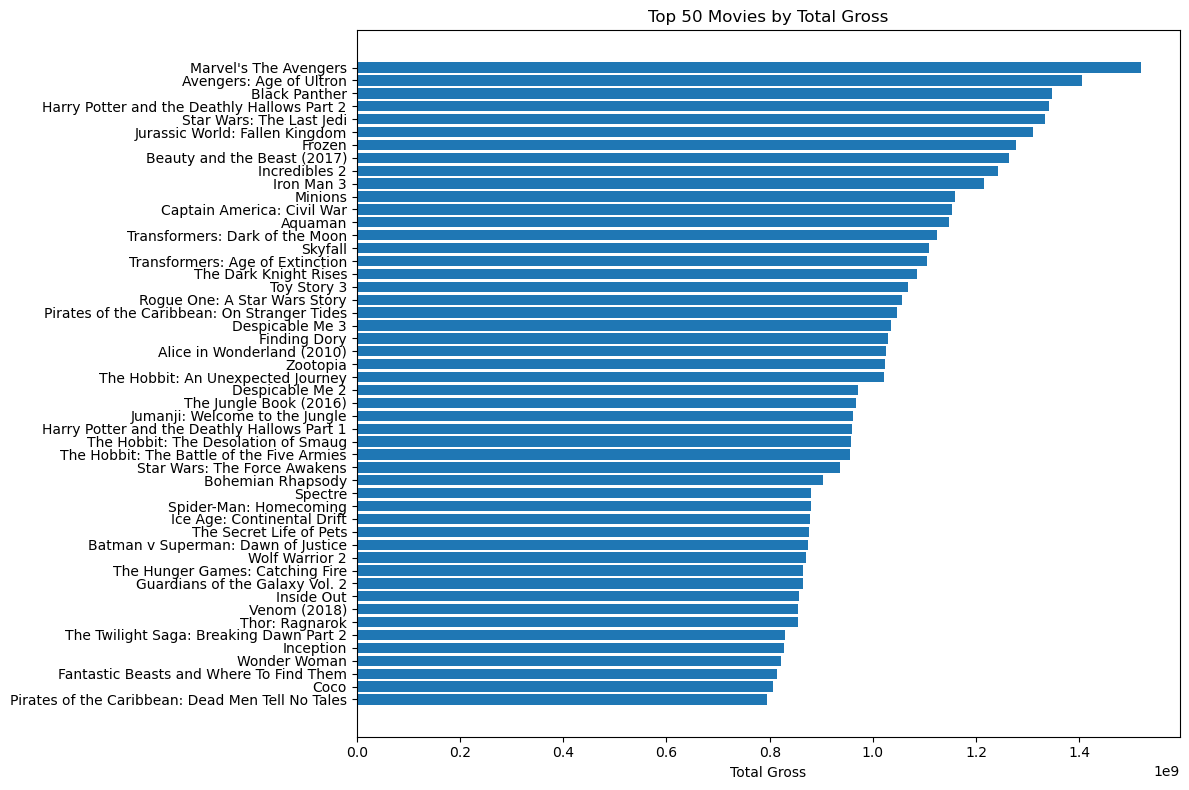

In [64]:
# Horizontal bargraph of  Movies by Total Gross(movie_gross_1)

# Selecting and sorting the top n movies by total gross
top_n = 50
top_movies = movie_gross_1.nlargest(top_n, 'total_gross')

# Plotting the top N movies by total gross
plt.figure(figsize=(12, 8))
plt.barh(top_movies['title'], top_movies['total_gross'])
plt.xlabel('Total Gross')
plt.title(f'Top {top_n} Movies by Total Gross')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


The bar graph shows us the top 50 movies in the data set that had the most gross income.




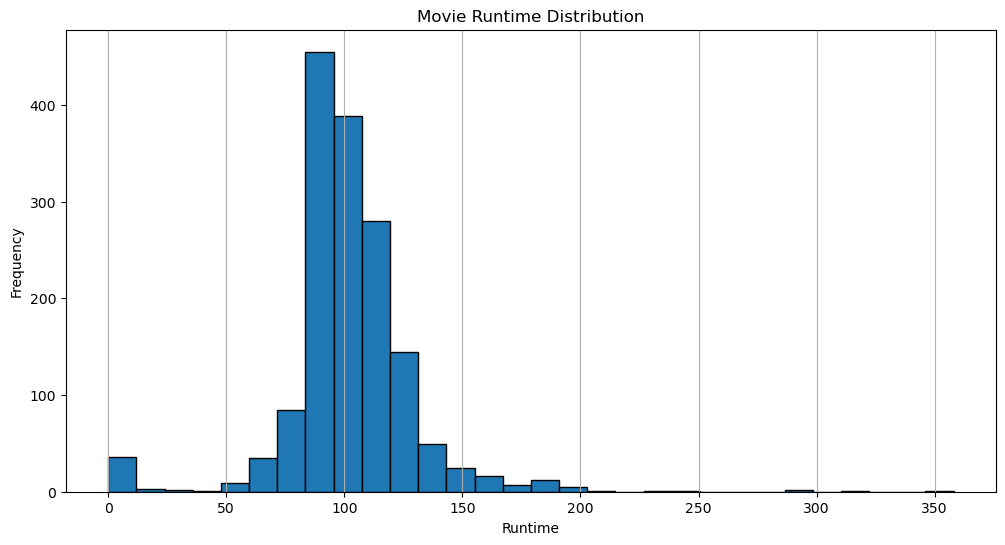

In [63]:
# remove 'minutes' from runtime and replace 'nan' with 0.
# convert runtime to numeric
movie_info_1.loc[:, 'runtime'] = movie_info_1['runtime'].replace({'minutes': '', 'nan': '0'}, regex=True)
movie_info_1.loc[:, 'runtime'] = pd.to_numeric(movie_info_1['runtime'])


# Histogram of movie runtime
plt.figure(figsize=(12, 6))
plt.hist(movie_info_1['runtime'], bins=30, edgecolor='black')
plt.title('Movie Runtime Distribution')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.grid(axis='x')  # Adding gridlines 

plt.show()




According to this histogram, the duration of most of the movies made is between 80 - 150 minutes.
This might be because it is the perfect duration to provide a comprehensive narrative while still holding the audience's attention. 

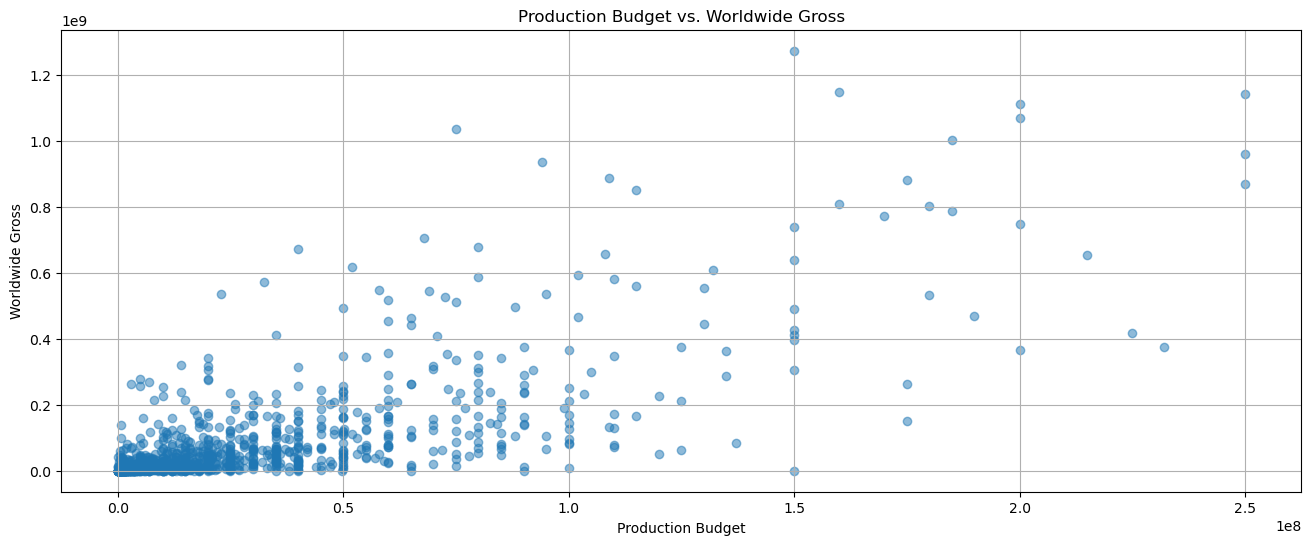

In [50]:
#production budget against world wide gross (movie_budgets_1)

# Sample a subset of 1000 rows 
sampled_data = movie_budgets_1.sample(n=1000) 

# Plotting 'worldwide_gross' against 'production_budget' for the sampled data
plt.figure(figsize=(16, 6))
plt.scatter(sampled_data['production_budget'], sampled_data['worldwide_gross'], alpha=0.5)
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.show()


In a random sample of  1000, all the movies which had a budget of 100,000,000 USD and below, generated a worldwide gross of 100,000,000 USD and below.
In the same sample, most movies with a budget of between 100,000,000 USD and 200,000,000 USD, generated a worldwide gross of 200,000,000 USD and below.
Another movie with a budget of 240,000,000 USD generated less than 50,000,000 USD. 
According to the scatter plot above, having a higher production Budget does not automatically mean that the movie will generate a high gross income nor will a lower budget lead to a low gross income. 
The performance depends on many other factors but ensuring the best equipment, cast and sets will only benefit the movie.

The  benefits brought on by bigger budgets can include: hiring of more skilled writers, directors, and actors; better sets and shooting locations and even better equipment. These factors can contribute to the production of movies that attract bigger audiences resulting in more worldwide gross income.




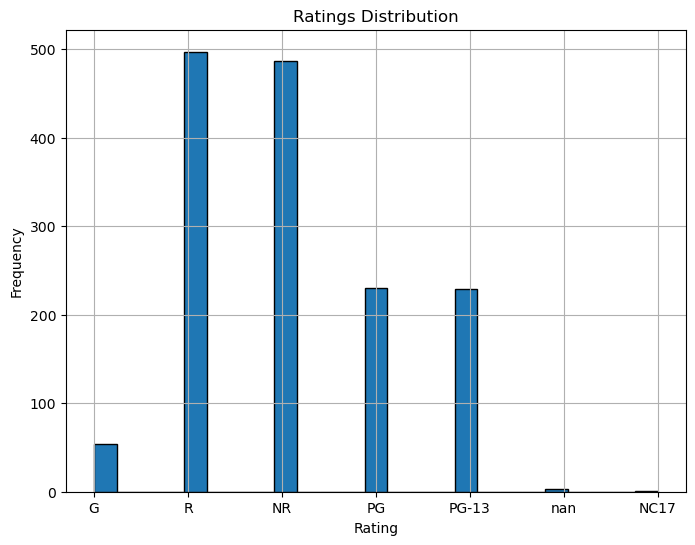

In [51]:
# histogram for ratings (movie_info_1)

# Sample a subset of 1500 rows
sampled_data = movie_info_1.sample(n=1500) 

# Plotting the distribution of 'runtime' for the sampled data using a histogram
plt.figure(figsize=(8, 6))
plt.hist(sampled_data['rating'], bins=25, edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram above shows how many times each rating occurs in a sample of the dataframe.
NR and R rated movies have the highest frequencies.

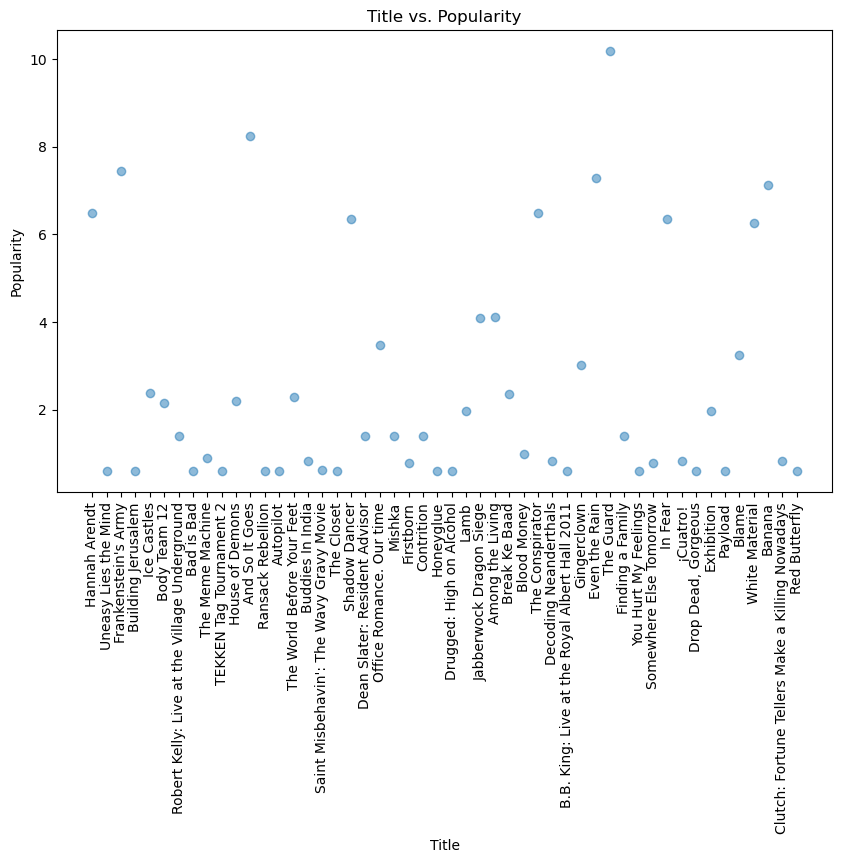

In [52]:
#Plotting a scatter plot for Title vs Popularity
# Sample a subset of 15 values
sampled_data = tmdb_1.sample(n=50)  

# Plotting the sampled data for 'title' against 'popularity'
plt.figure(figsize=(10, 6))
plt.scatter(sampled_data['title'], sampled_data['popularity'], alpha=0.5) 
plt.title('Title vs. Popularity')
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



The scatter plot above shows movie titles and their popularity.

C:\Users\BRENDA PC\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\BRENDA PC\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


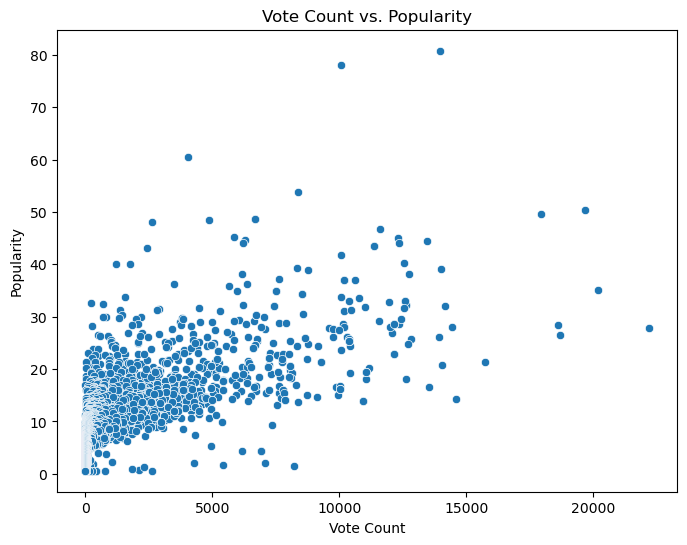

In [53]:
# Scatter plot of vote count vs. popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vote_count', y='popularity', data=tmdb_1)
plt.title('Vote Count vs. Popularity')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.show()


This scatter plot shows the vote count vs the popularity.

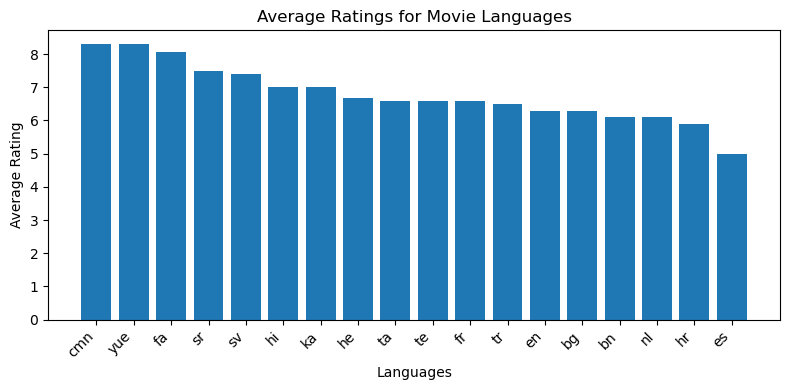

In [75]:
# using the query for getting more info about the database to plot Language against Average Movie Rating.
query = """
    SELECT b.primary_title, b.runtime_minutes, b.genres, r.averagerating, r.numvotes,
           a.region, a.language
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id) 
    JOIN movie_akas AS a USING (movie_id) 

    LIMIT 1000;
"""

cursor.execute(query)
results = cursor.fetchall()

# Dictionary to store language ratings and counts
language_ratings = {}
language_counts = {}

for row in results:
    language = row[6]  
    rating = row[3]    
    
    if language is not None:  # Checking for None values
        if language in language_ratings:
            language_ratings[language] += rating
            language_counts[language] += 1
        else:
            language_ratings[language] = rating
            language_counts[language] = 1

# Calculate average ratings for each language
average_ratings = {lang: language_ratings[lang] / language_counts[lang] for lang in language_ratings}

# Sorting languages by average rating
sorted_languages = sorted(average_ratings.items(), key=lambda x: x[1], reverse=True)
languages, ratings = zip(*sorted_languages)

# Plotting the data
plt.figure(figsize=(8, 4))
plt.bar(languages, ratings)
plt.title('Average Ratings for Movie Languages')
plt.xlabel('Languages')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()



The languages with the highest rated movies are: Mandarin Chinese, Yue Chinese, Persian, Serbian and Swedish.

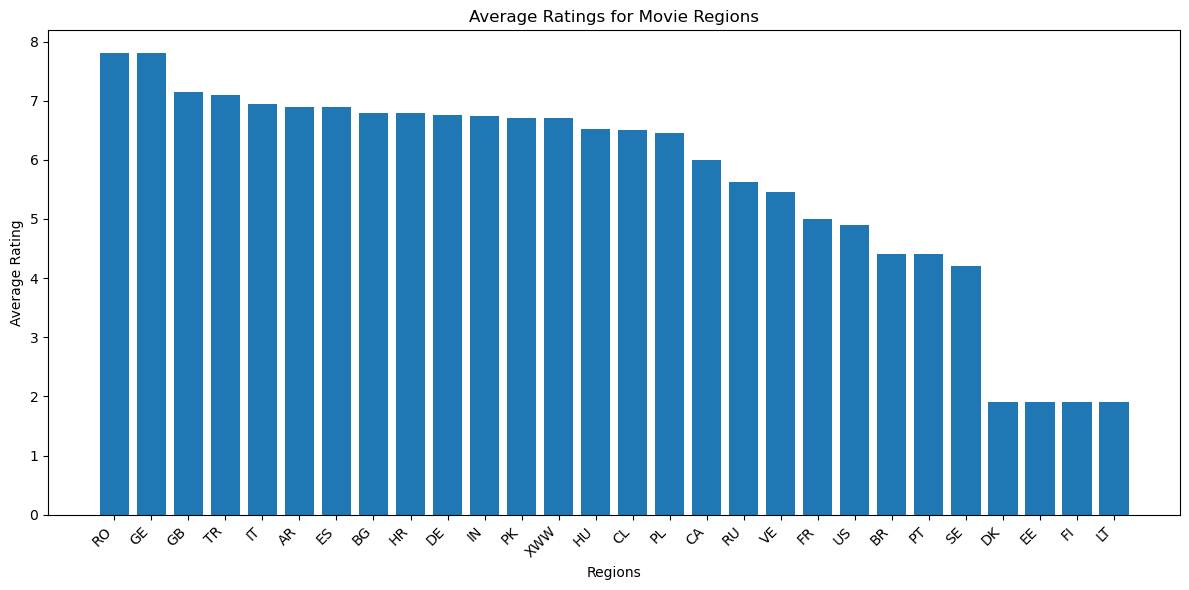

In [55]:
# using the query for getting more info about the database to plot Region against Average Movie Rating.
query = """
    SELECT b.primary_title, b.runtime_minutes, b.genres, r.averagerating, r.numvotes,
           a.region, a.language
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id) 
    JOIN movie_akas AS a USING (movie_id) 

    LIMIT 100;
"""

cursor.execute(query)
results = cursor.fetchall()

# Dictionary to store region ratings and counts
region_ratings = {}
region_counts = {}

for row in results:
    region = row[5]    
    rating = row[3]   
    
    if region is not None:  # Checking for None values
        if region in region_ratings:
            region_ratings[region] += rating
            region_counts[region] += 1
        else:
            region_ratings[region] = rating
            region_counts[region] = 1

# Calculate average ratings for each region
average_ratings = {reg: region_ratings[reg] / region_counts[reg] for reg in region_ratings}

# Sorting regions by average rating
sorted_regions = sorted(average_ratings.items(), key=lambda x: x[1], reverse=True)
regions, ratings = zip(*sorted_regions)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(regions, ratings)
plt.title('Average Ratings for Movie Regions')
plt.xlabel('Regions')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()


The regions with the highest rated movies are: Romania, Georgia, United Kingdom and Turkey. 

In [56]:
# getting distinct region to see whether there is an explanation for the regional codes.
cursor.execute("SELECT DISTINCT region FROM movie_akas LIMIT 20;")
results = cursor.fetchall()

for row in results:
    print(row)


('BG',)
('JP',)
('BR',)
('FR',)
('GR',)
('IT',)
('HR',)
('IL',)
('MX',)
('EE',)
('SE',)
('US',)
('DE',)
('XWW',)
('LV',)
('PT',)
('RU',)
('CZ',)
('CA',)
('CL',)


There are no further explanations for the regional codes.

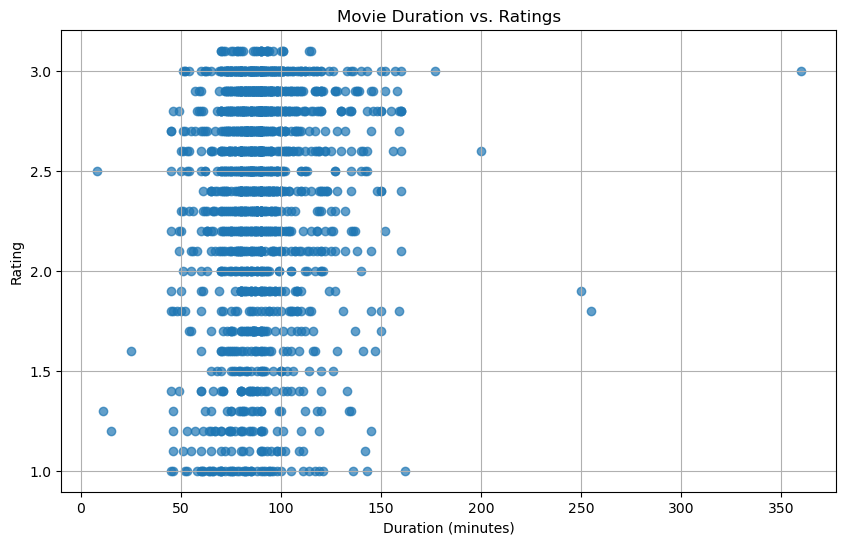

In [57]:
# using the query for getting more info about the database to plot 
# scatter plot of durations against ratings for the last 2000 movies with the lowest ratings.

query = """
    SELECT b.primary_title, b.runtime_minutes, r.averagerating
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id)
    ORDER BY r.averagerating ASC
    LIMIT 2000;
"""

cursor.execute(query)
results = cursor.fetchall()


# Lists to store durations and ratings
durations = []
ratings = []

for row in results:
    durations.append(row[1])  
    ratings.append(row[2])  

# Plotting the durations against ratings
plt.figure(figsize=(10, 6))
plt.scatter(durations, ratings, alpha=0.7)
plt.title('Movie Duration vs. Ratings')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


In a sample of 2000 data points, most movies with a rating of 3.0 and below have a duration of between 50 and 150 minutes.

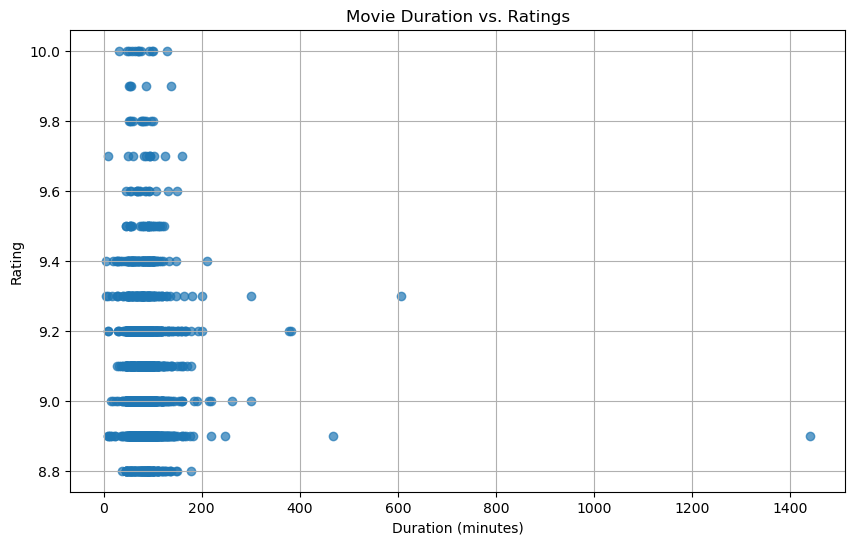

In [58]:
# using the query for getting more info about the database to plot 
# scatter plot of durations against ratings for the first 2000 movies with the highest ratings.

query = """
    SELECT b.primary_title, b.runtime_minutes, r.averagerating
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id)
    ORDER BY r.averagerating DESC
    LIMIT 2000;
"""

cursor.execute(query)
results = cursor.fetchall()


# Lists to store durations and ratings
durations = []
ratings = []

for row in results:
    durations.append(row[1]) 
    ratings.append(row[2])  

# Plotting the durations against ratings
plt.figure(figsize=(10, 6))
plt.scatter(durations, ratings, alpha=0.7)
plt.title('Movie Duration vs. Ratings')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


In a sample of 2000 data points, most movies with a rating of 8.8 and above have a duration of below 200 minutes.
A handful of movies have a duration of above 200 minutes. 
This aligns with the findings from movie_info_1 dataset that most movies made have a duration of 80 - 150 minutes.

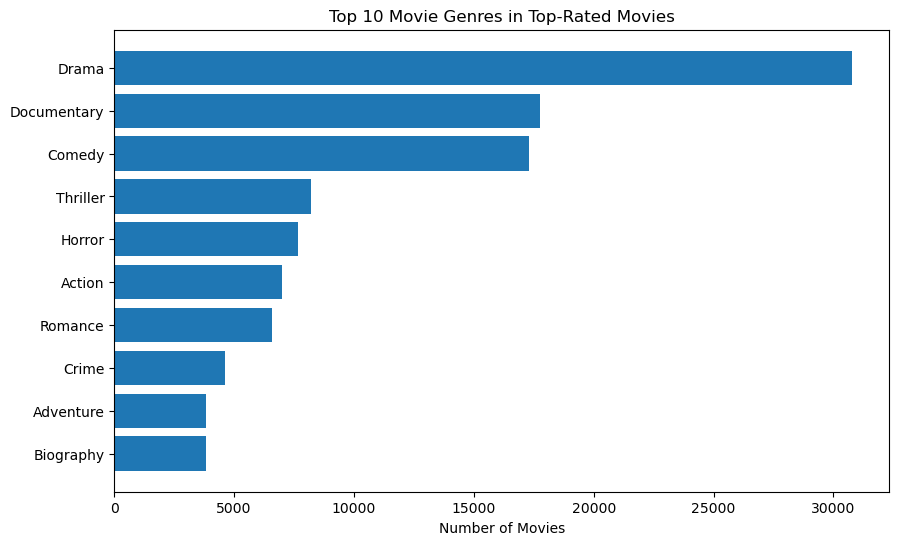

In [72]:
# using the query for getting more info about the database to plot 
# horizontal bar graph  of Top 10 Movie Genres in Top-Rated Movies.

query = """
    SELECT b.primary_title, b.runtime_minutes, b.genres, r.averagerating, r.numvotes
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id)
    ORDER BY r.averagerating ASC;
"""
    
cursor.execute(query)
results = cursor.fetchall()

# Dictionary to store genre counts
genre_counts = {}

for row in results:
    genres = row[2].split(',') if row[2] else []
    for genre in genres:
        genre = genre.strip()  # Removing extra spaces
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Sort genres by count in descending order
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Extracting genres and counts
top_genres = [genre[0] for genre in sorted_genres[:10]]  # Top 10 genres
genre_counts = [genre[1] for genre in sorted_genres[:10]]  # Counts of top 10 genres

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(top_genres, genre_counts)
plt.xlabel('Number of Movies')
plt.title('Top 10 Movie Genres in Top-Rated Movies')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent genre on top
plt.show()


This bar graph shows that the genres with the most made movies are: Drama, Documentary and Comedy

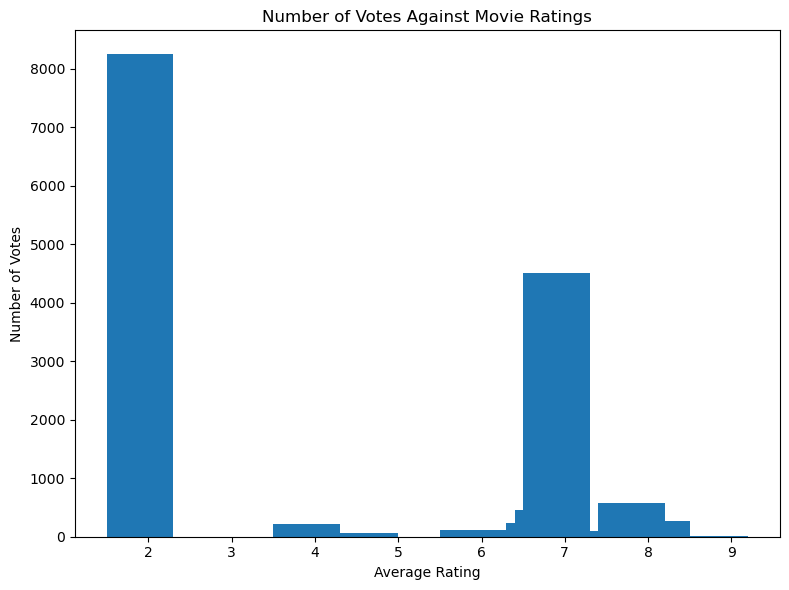

In [73]:
# using the query for getting more info about the database to plot 
# a Bar Graph sowing the Number of votes against the rating.

query = """
    SELECT r.averagerating, r.numvotes
    FROM movie_basics AS b
    JOIN movie_ratings AS r USING (movie_id) 
    JOIN movie_akas AS a USING (movie_id) 
    LIMIT 100; 
"""

cursor.execute(query)
results = cursor.fetchall()

# Lists to store data for plotting
ratings = []
num_votes = []

# fetching the data
for row in results:
    ratings.append(row[0])
    num_votes.append(row[1])


# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(ratings, num_votes)
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.title('Number of Votes Against Movie Ratings')
plt.tight_layout()
plt.show()


This bar graph shows the number of votes against the Average Rating.
The rating with the highest frequency is 2 then 7 and 8. 

In [61]:
#closing the sqlite3 connection
conn.close()

## 6. Conclusions


- Majority of movies fall within the duration range of 80 to 150 minutes. This duration seems to strike an optimal balance, allowing for a comprehensive narrative while maintaining audience engagement throughout the film.




- A higher production budget doesn't  guarantee a higher gross income, nor does a lower budget guarantee a lower gross income. 




- Movies rated as NR and R tend to occur most frequently, suggesting a notable presence of films falling within these rating categories.




- Languages such as Mandarin Chinese, Yue Chinese, Persian, Serbian, and Swedish appear prominently in the highest-rated movies. 




- Drama, Documentary, and Comedy are the most prevalent genres among the movies analyzed.

## 7. Recommendations


- Movie Durations - The observation that most movies fall within the 80 to 150-minute range suggests that this duration strikes an optimal balance, allowing for a comprehensive narrative while maintaining audience engagement throughout the film. Consider making movies that fall within this range.



- A higher production budget doesn't inherently guarantee a higher gross income, nor does a lower budget guarantee a lower gross income. The success of a movie bepends on many other elements. While an adequate budget is important, the ultimate performance of a film is influenced by various factors such as production quality, cast, and set design.Focus on factors beyond budget, such as script quality, cast talent, effective marketing, and audience targeting, to optimize revenue generation.



- Noting that NR (Not Rated) and R-rated movies have the highest frequencies implies a bigger market for mature and non-rated content. Tailor movie creation to target these audience segments.



- Identifying Mandarin Chinese, Yue Chinese, Persian, Serbian, and Swedish as languages associated with highly-rated movies suggests potential markets where films can find success. Consider diversifying language options to reach a broader audience.




- Popular Movie Genres: The insight that Drama, Documentary, and Comedy are the most made genres highlights their popularity among filmmakers and audiences. Explore these genres or combinations of them to create unique films. 
